In [2]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [5]:
#os.chdir('/content/drive/My Drive/01 UTFSM/04 Memoria/02 Avances/Python') #carpeta de trabajo, aqui estan los archivos.py a cargar
from FunXSpectra import FunXSpectra
from relleno_zeros import relleno_zeros

In [ ]:
#direccion completa del archivo a cargar
nc_file='/content/drive/My Drive/01 UTFSM/04 Memoria/06 HDD/tareas/tarea02/HySea/3l/24h/layer01_ts.nc'

nc_data=xr.open_dataset(nc_file)
# ver contenidos archivo nc (grd)
with nc_data as ds:
  print(ds.keys())

KeysView(<xarray.Dataset>
Dimensions:         (grid_npoints: 2, time: 86402)
Coordinates:
  * time            (time) datetime64[ns] 1970-01-01 ... 1970-01-02T00:00:01.463407208
Dimensions without coordinates: grid_npoints
Data variables:
    deformed_bathy  (grid_npoints) float64 ...
    longitude       (grid_npoints) float64 ...
    latitude        (grid_npoints) float64 ...
    min_height      (grid_npoints) float64 ...
    max_height      (grid_npoints) float64 ...
    eta             (time, grid_npoints) float64 ...
    ux              (time, grid_npoints) float64 ...
    uy              (time, grid_npoints) float64 ...
Attributes:
    Conventions:                    CF-1.0
    title:                          Time series output of TsunamiHySEA model
    creator_name:                   EDANYA Group
    institution:                    University of Malaga
    comments:                       No paper
    references:                     http://path.to.paper/paper.pdf
    history:      

## plotear boyas

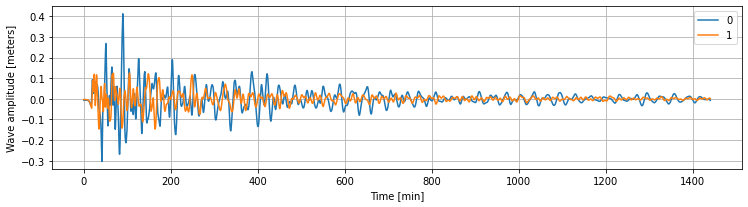

In [ ]:
boyas_sel=[0,1] #seleccionar boyas a plotear

time_min=(nc_data.time-nc_data.time[0])/ pd.Timedelta("1m")
nc_data = nc_data.assign_coords(time_min=("time", time_min))

#ployea series seleccionadas
nc_data.eta.isel(grid_npoints=boyas_sel).plot.line(x="time_min",aspect=3.5,size=3)
plt.legend(boyas_sel)
plt.tight_layout()
plt.grid()
xlabel=plt.xlabel('Time [min]')

## Espectros

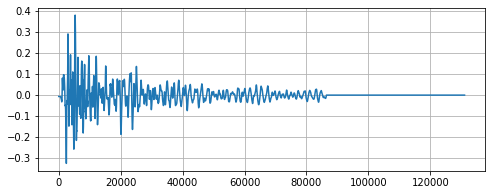

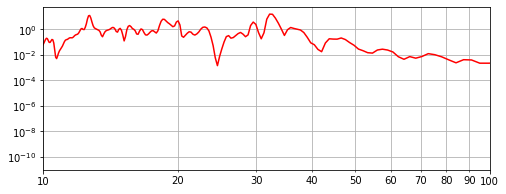

In [ ]:
#Espectros
boya_1=0
boya_2=0

y1=nc_data.eta.isel(grid_npoints=boya_1)
y2=nc_data.eta.isel(grid_npoints=boya_2)

y1=relleno_zeros(y1) #rellena con ceros hasta la siguiente potencia de dos
y2=relleno_zeros(y2)

fig1,ax1=plt.subplots(figsize=(8,3))
ax1.plot(y1)
ax1.grid()

f,S1,S2,coh2,phase,bw=FunXSpectra(y1,y2,1,4,0)

fig2,ax2=plt.subplots(figsize=(8,3))
plt.xlim(10,100)
ax2.yaxis.grid(which="major")
ax2.xaxis.grid(which="both")

ax2.loglog(1/f/60,S1,color='r')

ax2.xaxis.set_major_formatter(mtick.ScalarFormatter())
ax2.xaxis.set_minor_formatter(mtick.ScalarFormatter())


## Comparar espectros de varios archivos distintos

bg_valp_24h.npz


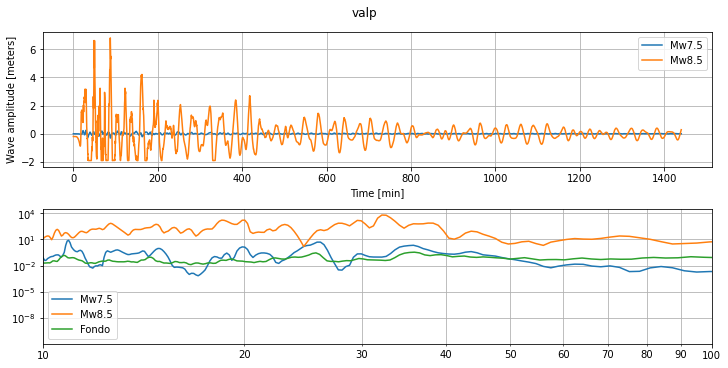

In [12]:
# comparar espectros de dos archivos distintos
nc_file1=r"G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Tareas\tarea02\HySea\mw75\4l\24h\layer01_ts.nc"
nc_file2=r"C:\Users\madia\Desktop\layer01_85_ts.nc"

# archivo con espectro de fondo'
bg_file=r"G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Tareas\tarea02\background_spectra\bg_valp_24h.npz"

nc_files=[nc_file1,nc_file2]
localidades=['coqu','valp'] #aqui anotar a que localidad corresponde cada boya. en orden
etiquetas=['Mw7.5','Mw8.5','Fondo'] #para darle etiqueta con ax.legends

boya_sel=1 ###seleccionar boyas a plotear

fig1,(ax1,ax2)=plt.subplots(2, 1, figsize=(10, 5),constrained_layout=True)
fig1.suptitle(localidades[boya_sel])

for i in range(len(nc_files)): #para cada archivo nc de la lista
    nc_data=xr.open_dataset(nc_files[i]) #carga el archivo i
    time_min=(nc_data.time-nc_data.time[0])/ pd.Timedelta("1m") #estas dos lineas configuran la serie desde formato datetime a minutos
    nc_data = nc_data.assign_coords(time_min=("time", time_min))
    
    serie_i=nc_data.eta.isel(grid_npoints=boya_sel) #serie de tiempo de la boya seleccionada
    
    #plotea series de tiempo seleccionadas
    nc_data.eta.isel(grid_npoints=boya_sel).plot.line(ax=ax1,x="time_min")
    ##analisis espectral
    y1=nc_data.eta.isel(grid_npoints=boya_sel)
    y2=nc_data.eta.isel(grid_npoints=boya_sel)
    y1=relleno_zeros(y1) #rellena con ceros hasta la siguiente potencia de dos
    y2=relleno_zeros(y2)
    f,S1,S2,coh2,phase,bw=FunXSpectra(y1,y2,1,4,0)
    ax2.loglog(1/f/60,S1)

bg_data=np.load(bg_file)
S=bg_data['S']
f=bg_data['f']

ax2.loglog(1/f/60,S)

plt.xlim(10,100)
ax2.yaxis.grid(which="major")
ax2.xaxis.grid(which="both")
ax2.legend(etiquetas)

ax1.legend(etiquetas)
ax1.grid()

ax1.set_xlabel('Time [min]')

ax2.xaxis.set_major_formatter(mtick.ScalarFormatter())
ax2.xaxis.set_minor_formatter(mtick.ScalarFormatter())

print(os.path.basename(bg_file))